In [1]:
import veloagent
import anndata
import torch
import matplotlib.pyplot as plt
import numpy as np
import scvelo as scv
import scanpy as sc

Global seed set to 0


## Load AnnData

In [2]:
adata = anndata.read_h5ad('/Users/brentyoon/Documents/COMP402/code/dataset/mydata.h5ad')
genes_to_keep = ~adata.var_names.str.startswith("ENSG")
adata = adata[:, genes_to_keep]

In [3]:
sc.pp.neighbors(adata, n_neighbors=30)

max_neighbors = 29
neighbor_indices = []

mat = adata.obsp['connectivities'].todense()

for row in mat:
    neighbors = np.nonzero(row)[1]
    padded = np.full(max_neighbors, -1, dtype=int)  # -1 indicates no neighbor
    padded[:min(len(neighbors), max_neighbors)] = neighbors[:max_neighbors]
    neighbor_indices.append(padded)

neighbor_indices = np.array(neighbor_indices, dtype=int)
adata.uns['neighbors']['indices'] = neighbor_indices

## Perturbation parameters

In [ ]:
# for option 1
cluster_edges_opt1 = [('cancer1','stromal cells'),('cancer2','stromal cells'),('cancer2','fibroblasts')]

In [4]:
# for option 2
cluster_edges_opt2 = ['cancer1','stromal cells','cancer2','fibroblasts']

In [13]:
cluster_name = 'clusters'
my_pert_param = 'alpha'

## Velocity projection before perturbation

In [ ]:
scv.tl.velocity_graph(adata, vkey='velocity')
scv.pl.velocity_embedding_stream(adata,
                                    legend_loc="right margin", 
                                    vkey='velocity', 
                                    basis='umap', 
                                    color=[cluster_name],
                                    dpi=150)

## Calculating gene score for perturbation

In [6]:
scores = veloagent.perturbation_score(adata, cluster_name, cluster_edges_opt2, vel_key='velocity_u', metric_option=2, pert_param=my_pert_param)

Processing gene 0/1011
Processing gene 100/1011
Processing gene 200/1011
Processing gene 300/1011
Processing gene 400/1011
Processing gene 500/1011
Processing gene 600/1011
Processing gene 700/1011
Processing gene 800/1011
Processing gene 900/1011
Processing gene 1000/1011


In [7]:
scores.sort_values(by='score')

,score
index,
TRABD2A,0.979125
PARP10,0.979580
CARD14,0.981694
ERCC1,0.992069
TSPOAP1-AS1,0.992527
...,...
LINC00960,1.000000
CAPS2-AS1,1.000000
CFAP20DC-AS1,1.000000


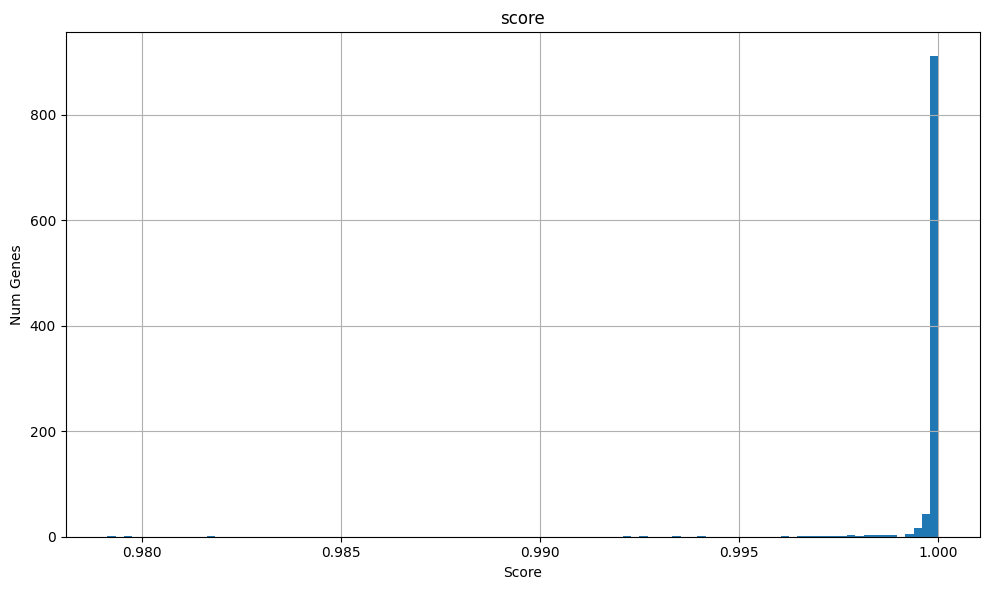

In [8]:
# plot histogram of scores
scores.hist(bins=100, figsize=(10, 6))
plt.xlabel('Score')
plt.ylabel('Num Genes')
plt.tight_layout()
plt.show()

In [9]:
# if you want to save the results
scores.to_csv('perturbations.csv')

## Perturbation

In [11]:
# Genes to perturb
gene_list = ['SLC25A34-AS1',
'SPATA21',
'ELOA-AS1',
'RCAN3AS',
'ZNF593OS',
'TAF12',
'SMIM12',
'KIAA0319L',
'PPIEL',
'EXO5-DT',
'ZNF691-DT',
'EBNA1BP2',
'KDM4A-AS1',
'SLC6A9',
'TMEM53',
'LRRC41'
'ATPAF1'
'CYP4A22-AS1'
'TUT4'
'FOXD3-AS1'
'ITGB3BP'
'ROR1-AS1'
'LRRC8C-DT'
'RWDD3-DT']

In [14]:
bdata = veloagent.perturb(adata, gene_list, my_pert_param, dt=0.5)

  0%|          | 0/1656 [00:00<?, ?cells/s]

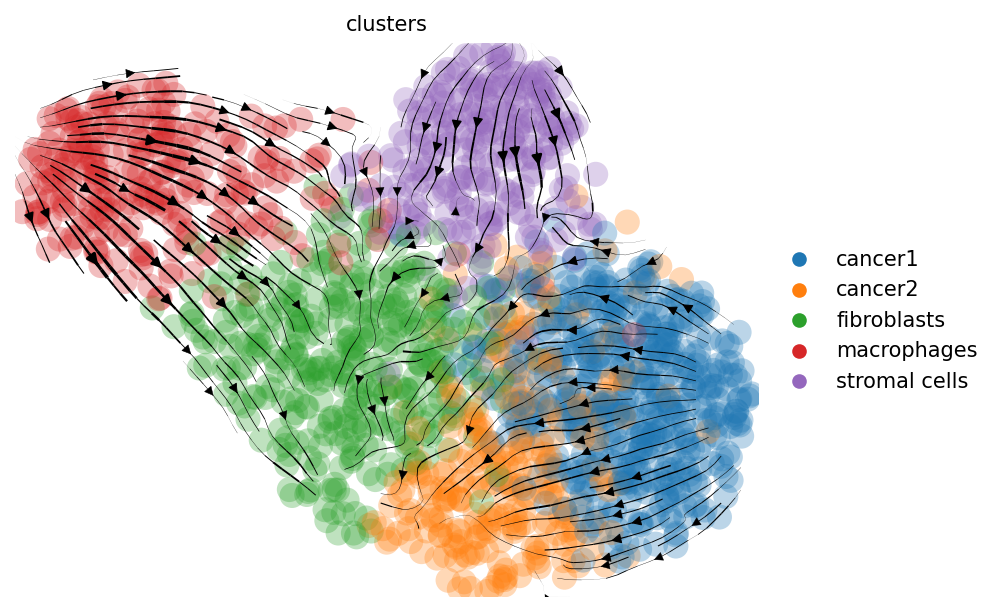

In [15]:
# RNA velocity after perturbation
scv.tl.velocity_graph(bdata, vkey='velocity')
scv.pl.velocity_embedding_stream(bdata,
                                 legend_loc="right margin", 
                                 vkey='velocity', 
                                 basis='umap', 
                                 color=[cluster_name],
                                 dpi=150)